# <center> Classificação de Gatos e Cachorros por Redes Neurais Convolucionais </center>

### Membros do Grupo
Daniel Godoy Marques - RA:  166213<br>
João Alberto Moreira Seródio - RA: 218548<br>
Rodolfo Luis Tonoli - RA: 105652<br>



Links interessantes:
https://datascience.stackexchange.com/questions/26597/how-to-set-the-number-of-neurons-and-layers-in-neural-networks

https://www.youtube.com/watch?v=0AJECUm8gY0

https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

https://stackoverflow.com/questions/48285129/saving-best-model-in-keras


# Importando dataset

In [ ]:
#Acessa seu Drive
#É necessário clicar no link que vai aparecer, logar com uma conta google, autorizar o stream de dados, copiar o código de autenticação que vai aparecer aqui no notebook e apertar enter
#Depois, no canto esquerdo do notebook, clicar em Arquivos (terceiro ícone), acessar "drive" > "My Drive" para ver se funcionou.
#from google.colab import drive
#drive.mount('/content/drive')



#PELO KAGGLE:
# https://www.kaggle.com/general/74235
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tongpython/cat-and-dog
#!kaggle datasets list
!unzip cat-and-dog.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg 

In [ ]:
#Testando o acesso do notebook a base de dados
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Image as displayImage
from PIL import Image
import numpy as np
displayImage(filename='/content/test_set/test_set/cats/cat.4001.jpg')
import seaborn as sns

#As fotos em test_set/cats/ não são gatos:
# cat.4085.jpg
# cat.4688.jpg

#model = tf.keras.Sequential([tf.keras.layers.Dense()])
#Importando as imagens
# https://keras.io/api/preprocessing/image/
#path = '/content/drive/My Drive/ProjetoFinal/training_set/'
path = '/content/training_set/training_set'
path_test = '/content/test_set/test_set'
img_size = (64,64)
batch_size = 64
data_training = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path, 
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=666,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)

data_validation = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path, 
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=666,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

data_test = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path_test,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    image_size=img_size,
    shuffle=False,
    seed=171
)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
  ]

def plotHistory(history):
  fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True, dpi=300, figsize=(13,6))
  # summarize history for accuracy
  ax0.plot(history.history['accuracy'])
  ax0.plot(history.history['val_accuracy'])
  ax0.set_title('Acurácia do Modelo')
  ax0.set_ylabel('Acurácia')
  ax0.set_xlabel('Época')
  ax0.legend(['Treino', 'Validação'], loc='upper left')
  # summarize history for loss
  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Loss do Modelo')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Época')
  ax1.legend(['Treino', 'Validação'], loc='upper left')
  print('Acurácia máxima treino, validação:')
  print(max(history.history['accuracy']), max(history.history['val_accuracy']))
  print('Loss mínima treino, validação:')
  print(min(history.history['loss']), min(history.history['val_loss']))

def confmatrix(labels_original, predictions):
  cm = tf.math.confusion_matrix(labels=labels_original, predictions=predictions).numpy()
  figure = plt.figure(figsize=(6, 6))
  sns.heatmap(cm, annot=True,cmap=plt.cm.Blues, fmt='.4g', annot_kws={"fontsize":16})
  plt.tight_layout()
  plt.ylabel('Verdadeiro', fontsize=16)
  plt.xlabel('Previsto', fontsize=16)
  plt.show()

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.
Found 2023 files belonging to 2 classes.


# Teste dos parâmetros

## Batch Size

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 128

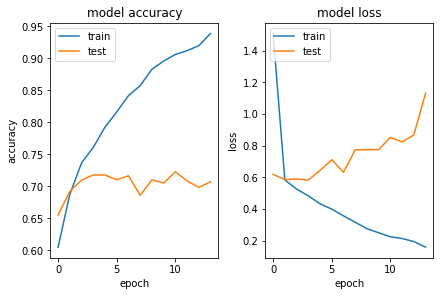

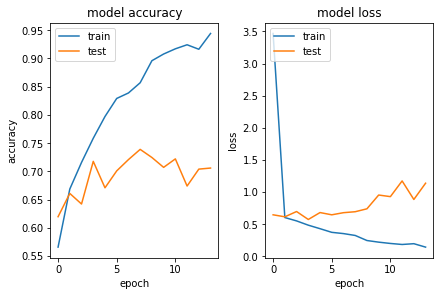

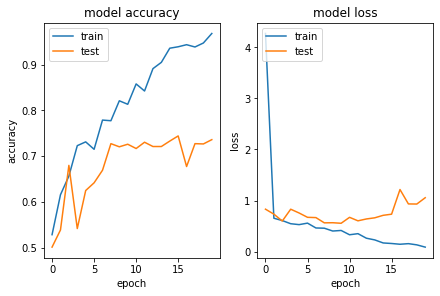

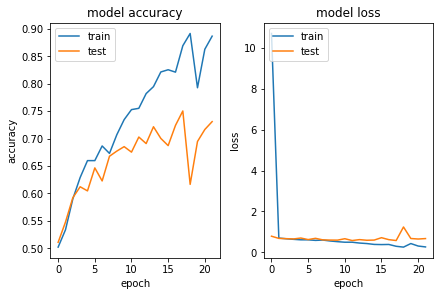

In [ ]:
histories = []
for batch_size in [32,64,128,256]:
  data_training_batchteste = tf.keras.preprocessing.image_dataset_from_directory(
      directory=path, 
      labels="inferred",
      label_mode="int",
      class_names=None,
      color_mode="rgb",
      batch_size=batch_size,
      image_size=img_size,
      shuffle=True,
      seed=666,
      validation_split=0.2,
      subset="training",
      interpolation="bilinear",
      follow_links=False,
  )

  data_validation_batchteste = tf.keras.preprocessing.image_dataset_from_directory(
      directory=path, 
      labels="inferred",
      label_mode="int",
      class_names=None,
      color_mode="rgb",
      batch_size=batch_size,
      image_size=img_size,
      shuffle=True,
      seed=666,
      validation_split=0.2,
      subset="validation",
      interpolation="bilinear",
      follow_links=False,
  )

  model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(64, 64, 3)),
      tf.keras.layers.Conv2D(128, 3, strides=2, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Conv2D(256, 3, strides=2, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])


  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  model.summary()
  history = model.fit(data_training_batchteste,validation_data=data_validation_batchteste,epochs=30, callbacks=my_callbacks)
  plotHistory(history)
  histories.append(history)
print(max(histories[0].history['val_accuracy']))
print(max(histories[1].history['val_accuracy']))
print(max(histories[2].history['val_accuracy']))
print(max(histories[3].history['val_accuracy']))

## Optimizer

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_71 (Dense)             (None, 64)              

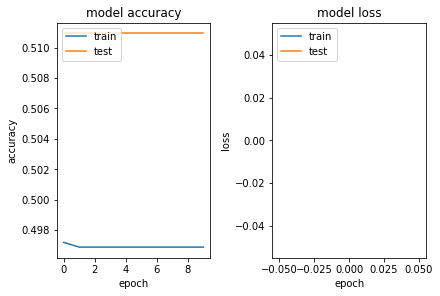

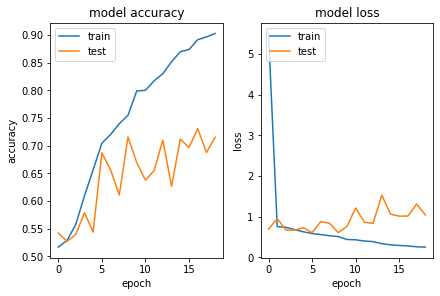

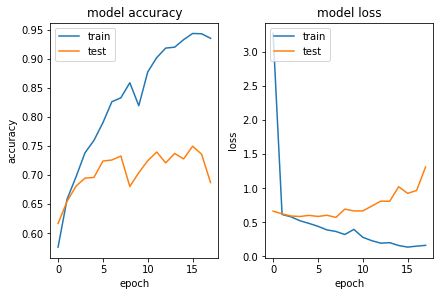

In [ ]:
#TESTANDO OPTIMIZER

histories = []
for opt in ['SGD','RMSprop','Adam']:

  model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(64, 64, 3)),
      tf.keras.layers.Conv2D(128, 3, strides=2, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Conv2D(256, 3, strides=2, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=opt,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  model.summary()
  history = model.fit(data_training,validation_data=data_validation,epochs=30, callbacks=my_callbacks)
  plotHistory(history)
  histories.append(history)
print(max(histories[0].history['val_accuracy']))
print(max(histories[1].history['val_accuracy']))
print(max(histories[2].history['val_accuracy']))

## Number of convolution filters

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_79 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_80 (Dense)             (None, 64)              

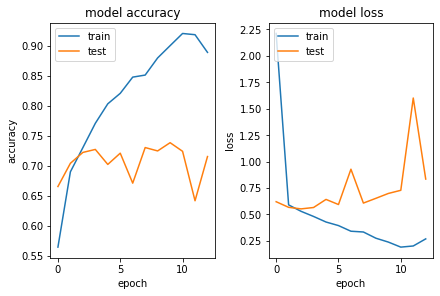

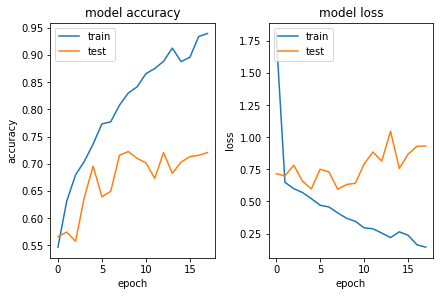

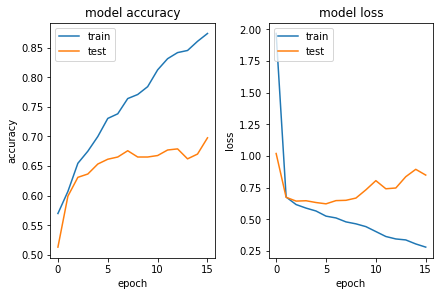

In [ ]:
#TESTANDO TAMANHO CONVOLUÇÃO

histories = []
for size in [256,128,64]:

  model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(64, 64, 3)),
      tf.keras.layers.Conv2D(size/2, 3, strides=2, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Conv2D(size, 3, strides=2, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])


  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  model.summary()
  history = model.fit(data_training,validation_data=data_validation,epochs=30, callbacks=my_callbacks)
  plotHistory(history)
  histories.append(history)
print(max(histories[0].history['val_accuracy']))
print(max(histories[1].history['val_accuracy']))
print(max(histories[2].history['val_accuracy']))

## Learning Rate

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_88 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_89 (Dense)             (None, 64)              

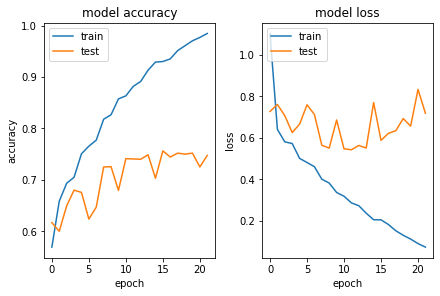

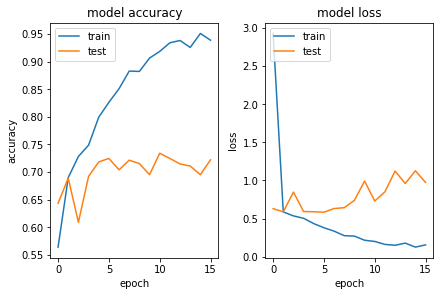

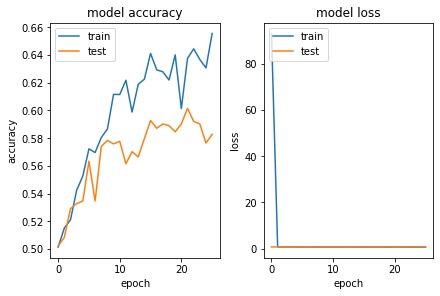

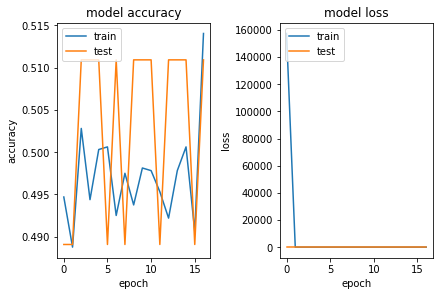

In [ ]:
#TESTANDO LEARNING RATE

histories = []
for lr in [0.0001,0.001,0.01,0.1]:

  model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(64, 64, 3)),
      tf.keras.layers.Conv2D(128, 3, strides=2, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Conv2D(256, 3, strides=2, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])


  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  model.summary()
  history = model.fit(data_training,validation_data=data_validation,epochs=30, callbacks=my_callbacks)
  plotHistory(history)
  histories.append(history)
print(max(histories[0].history['val_accuracy']))
print(max(histories[1].history['val_accuracy']))
print(max(histories[2].history['val_accuracy']))
print(max(histories[3].history['val_accuracy']))

# Our Model


## Sem Dropout

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 64, 64, 85)        2380      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 64, 85)        65110     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 85)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 128)       98048     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 256)      

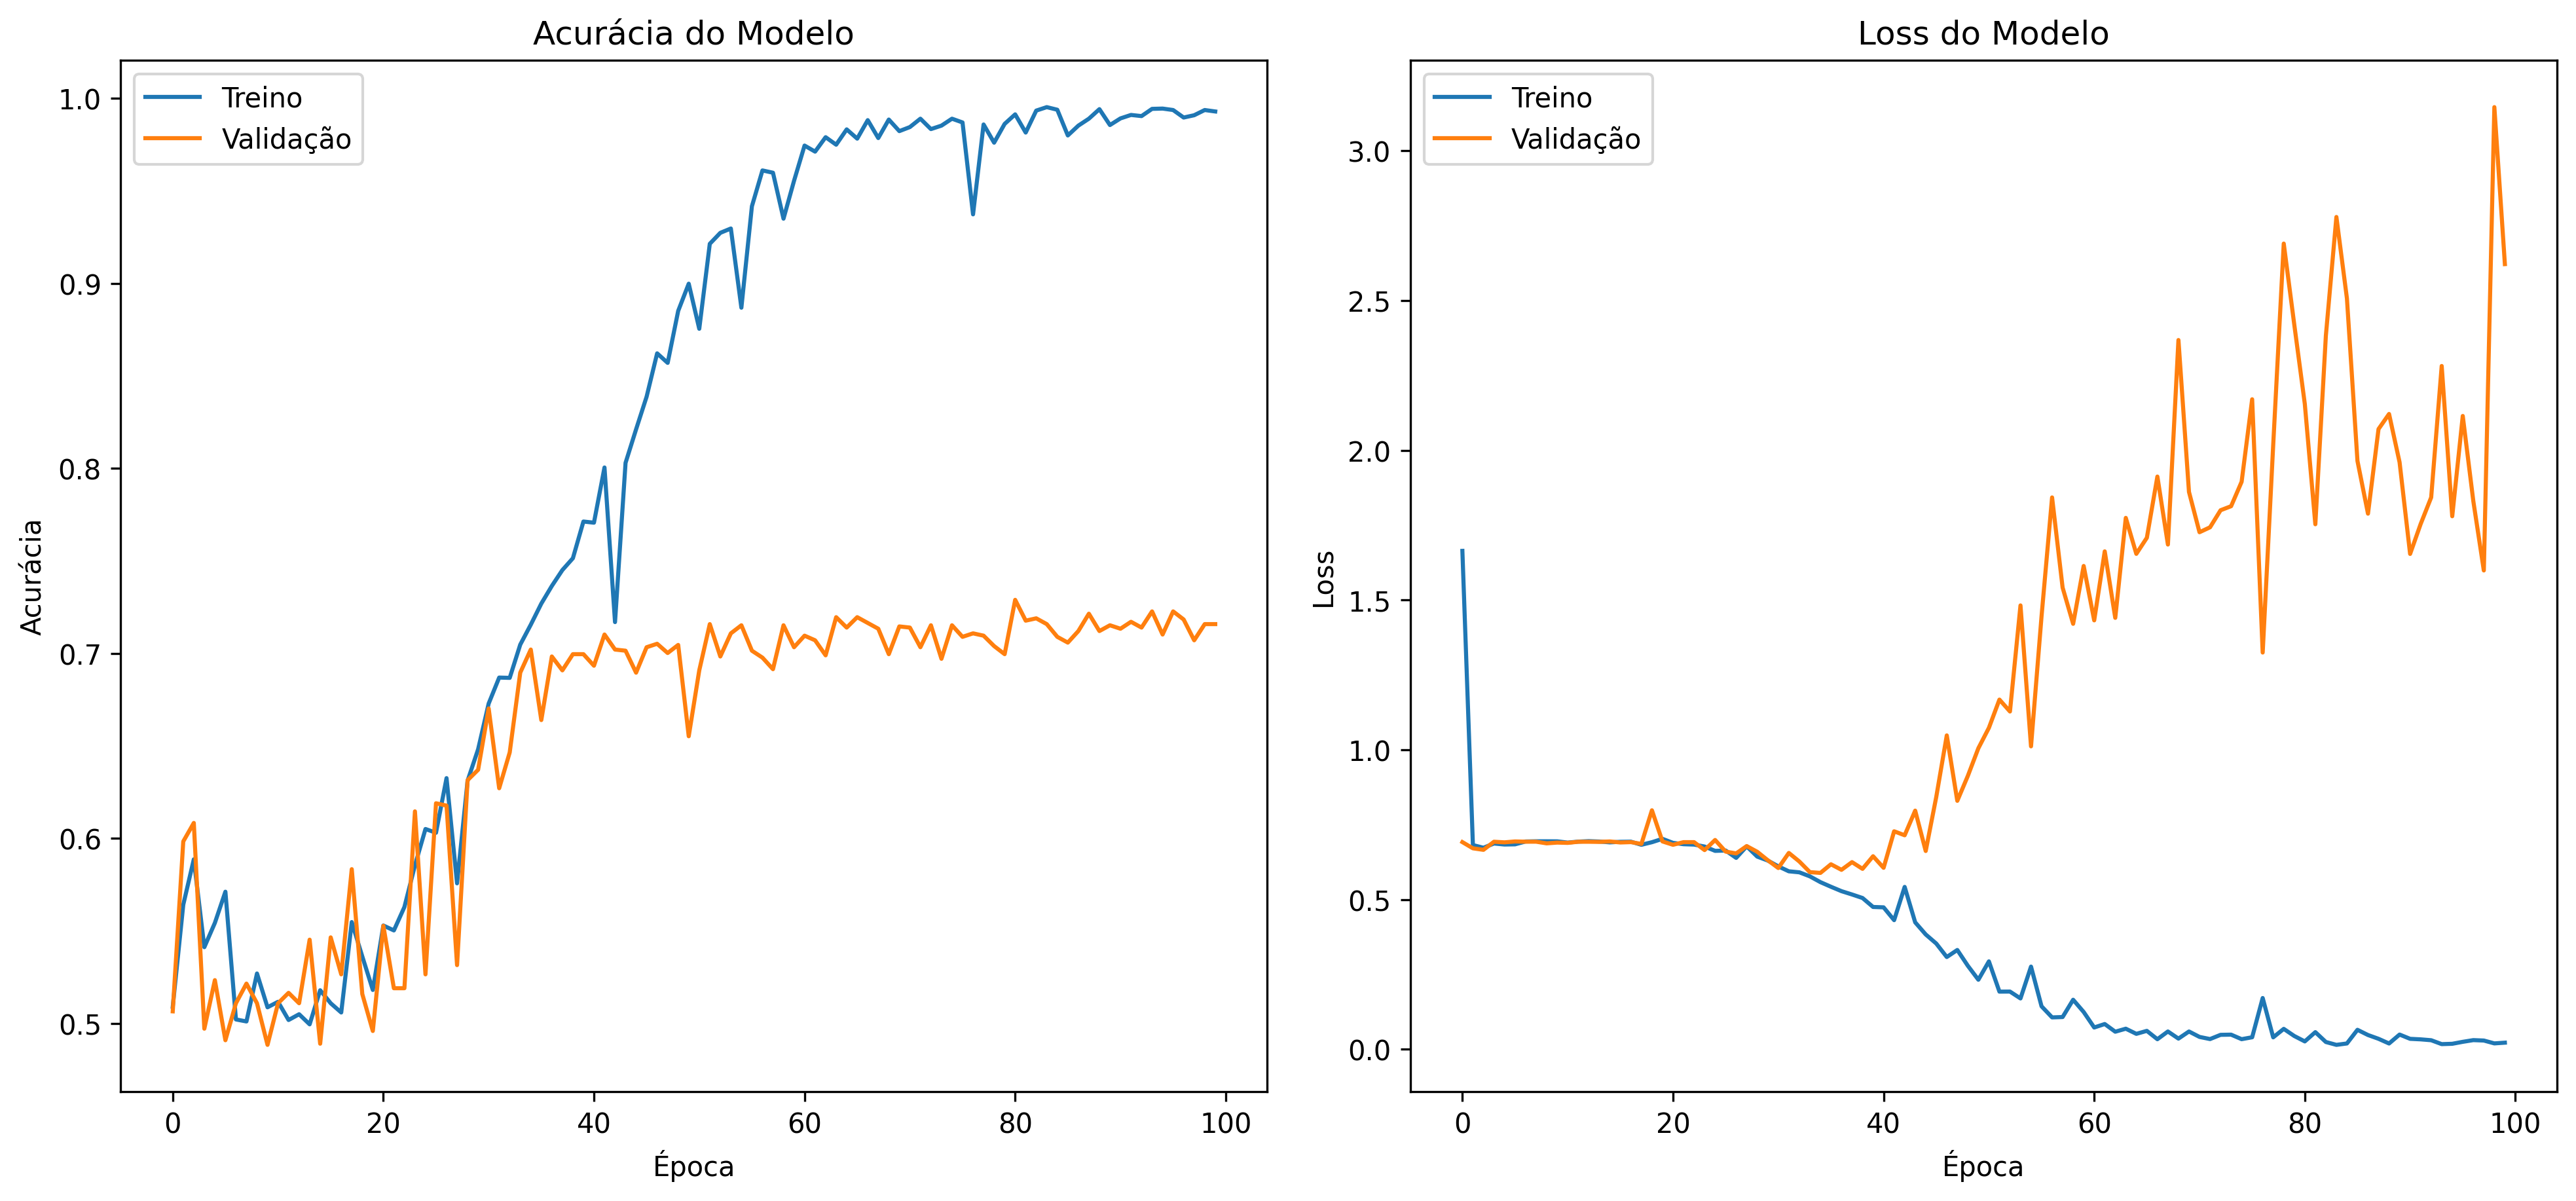

In [ ]:
# SETANDO BATCH SIZE 256 E LEARNING RATE = 0.0001
#TESTANDO REDE MAIOR
size = 256
lr = 0.001
model_nodropout = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(64, 64, 3)),
      tf.keras.layers.Conv2D(size/3, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.Conv2D(size/3, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Conv2D(size/2, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.Conv2D(size/2, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Conv2D(size, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.Conv2D(size, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Conv2D(size, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.Conv2D(size, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1028, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])


model_nodropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss='binary_crossentropy',
                metrics=['accuracy'])
model_nodropout.summary()
#history = model.fit(data_training,validation_data=data_validation,epochs=100, callbacks=my_callbacks)
history = model_nodropout.fit(data_training,validation_data=data_validation,epochs=100)
plotHistory(history)

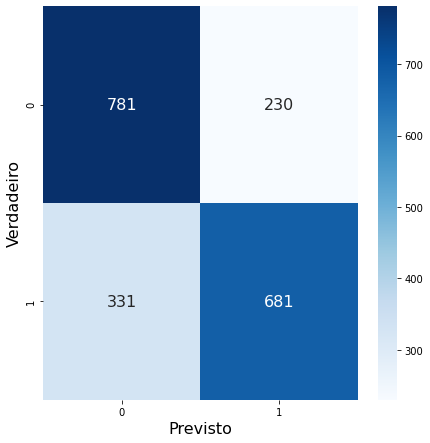

In [ ]:
resultado_nodropout = model_nodropout.predict(data_test)
rounded_nodropout = np.round(resultado_nodropout)
labels_nodropout = []
for img in data_test.as_numpy_iterator():
  labels_nodropout += list(img[1])
confmatrix(labels_nodropout,rounded_nodropout)

## Com dropout

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_4 (RandomFlip)   (None, 64, 64, 3)         0         
_________________________________________________________________
random_rotation_4 (RandomRot (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 85)        2380      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 85)        65110     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 85)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 85)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 128)      

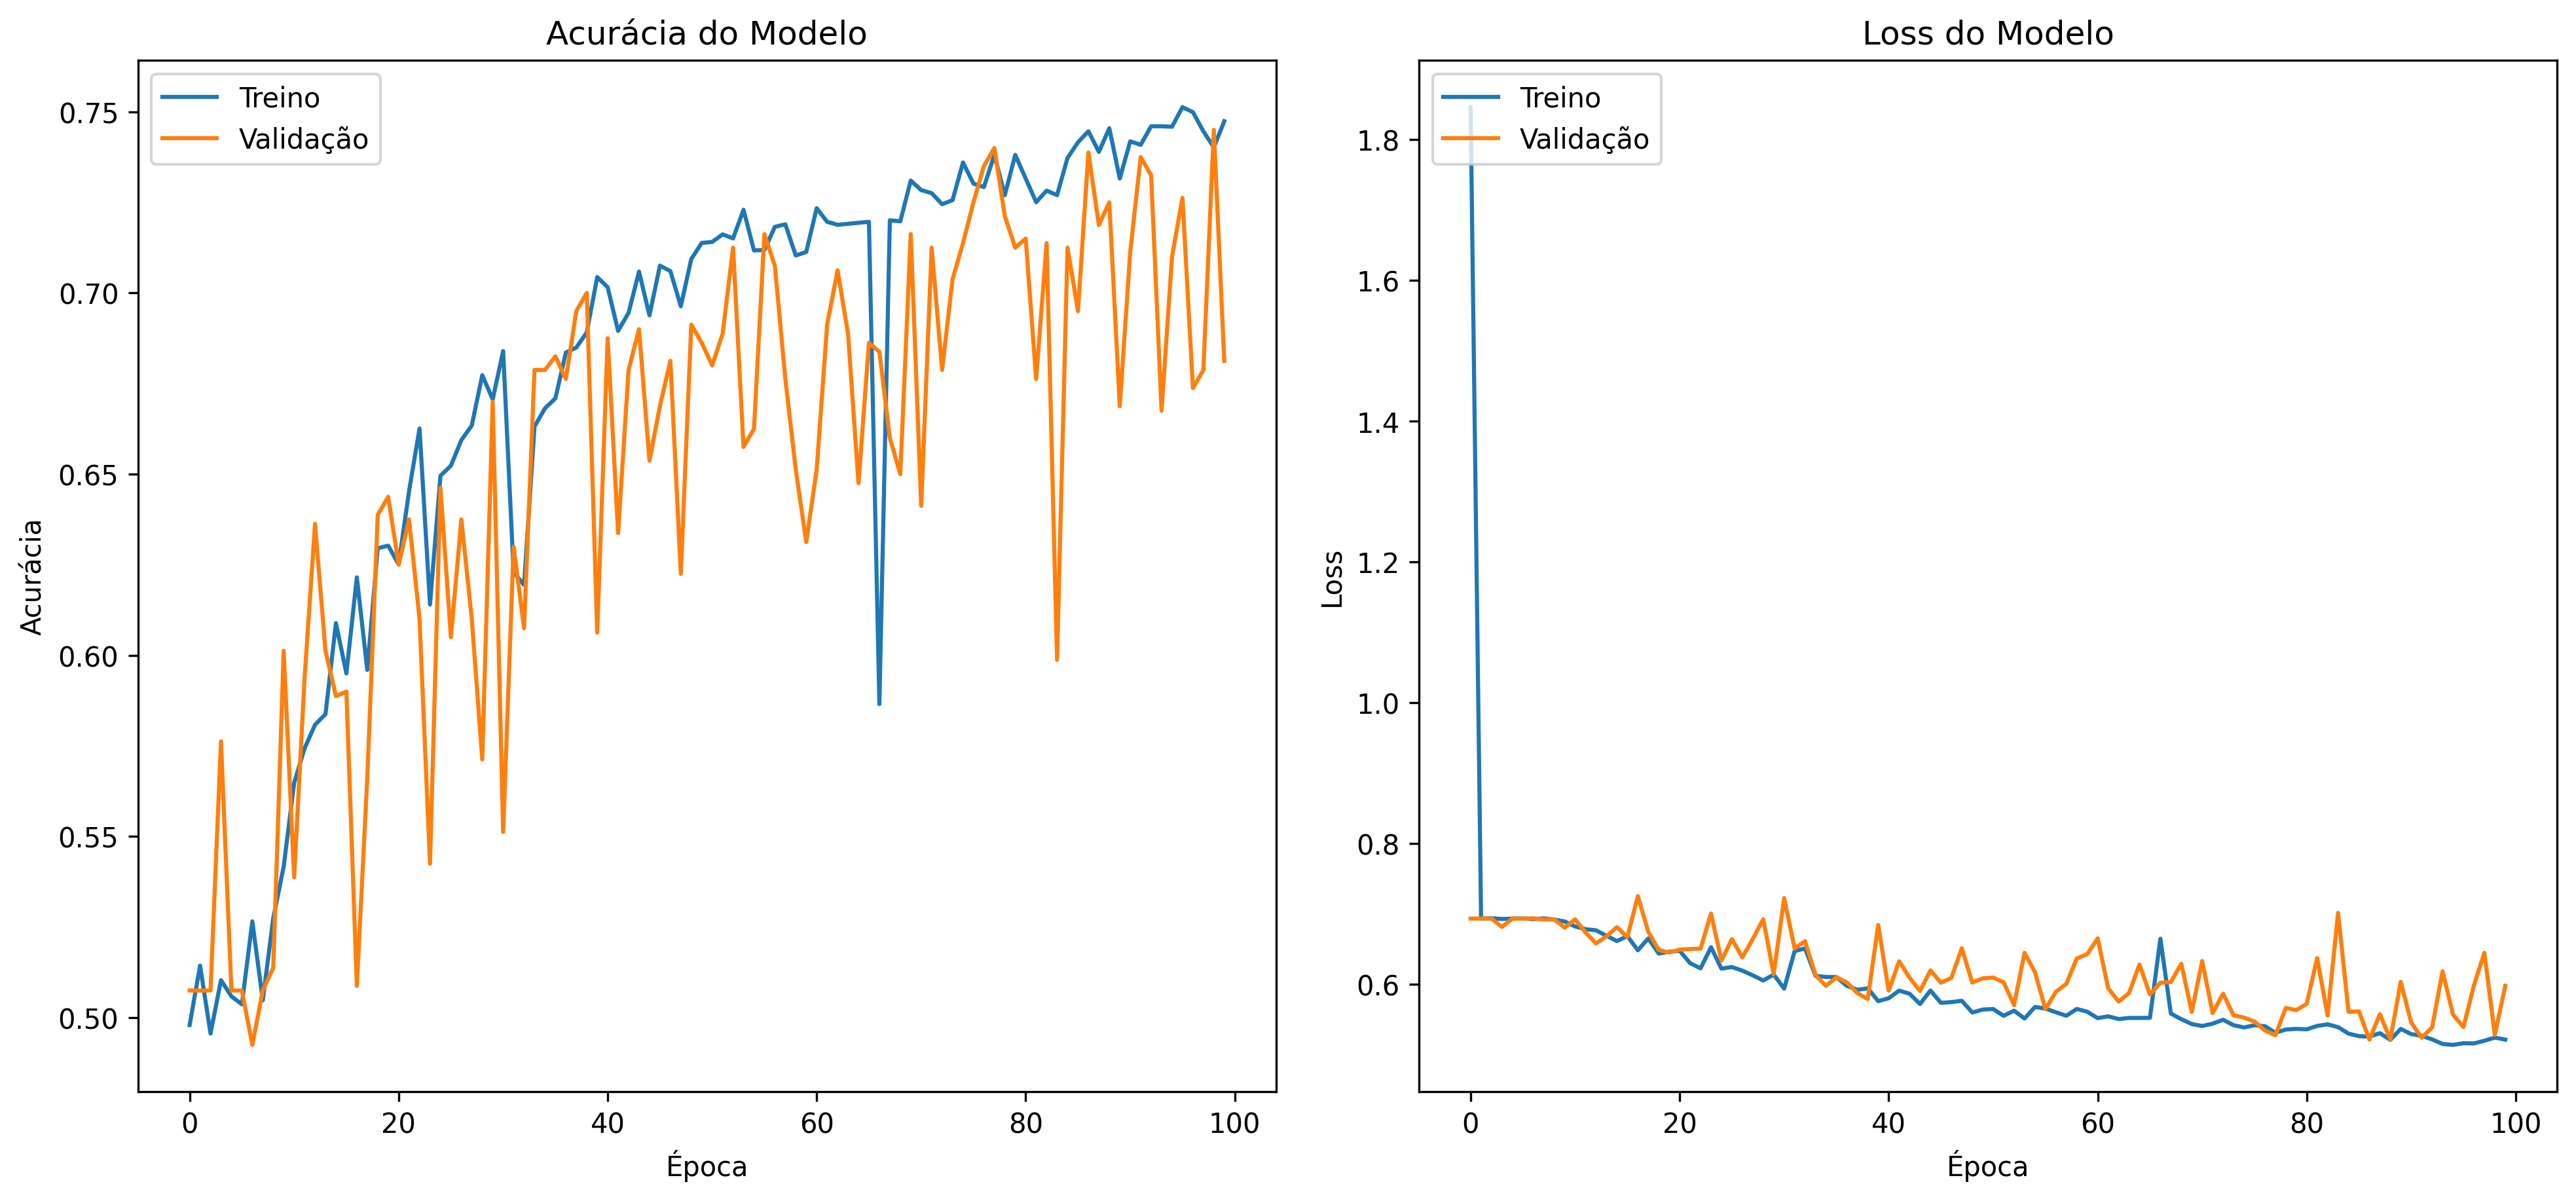

In [ ]:
size = 256
lr = 0.001
model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(64, 64, 3)),
      tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
      tf.keras.layers.experimental.preprocessing.RandomRotation(factor=(-0.2, 0.3)),
      tf.keras.layers.Conv2D(size/3, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.Conv2D(size/3, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Dropout(rate=0.2),
      tf.keras.layers.Conv2D(size/2, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.Conv2D(size/2, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Dropout(rate=0.2),
      tf.keras.layers.Conv2D(size, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.Conv2D(size, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Dropout(rate=0.2),
      tf.keras.layers.Conv2D(size, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.Conv2D(size, 3, strides=1, padding="same", activation='relu'),
      tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
      tf.keras.layers.Dropout(rate=0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1028, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss='binary_crossentropy',
                metrics=['accuracy'])
model.summary()
#history = model.fit(data_training,validation_data=data_validation,epochs=100, callbacks=my_callbacks)
history = model.fit(data_training,validation_data=data_validation,epochs=100)
plotHistory(history)

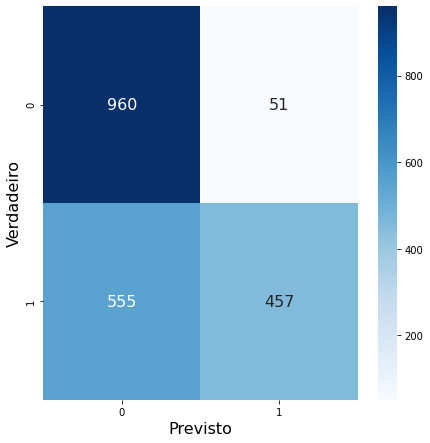

In [ ]:
resultado = model.predict(data_test)
rounded = np.round(resultado)
labels = []
for img in data_test.as_numpy_iterator():
  labels += list(img[1])
confmatrix(labels,rounded)

### Teste

Gato: 81.94 por cento. Cachorro: 18.06 por cento.


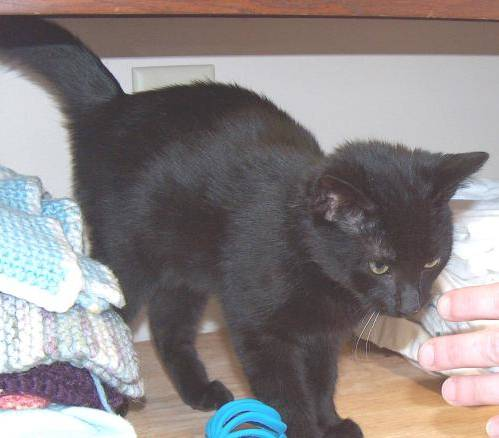

In [ ]:
#Acerto
img_path = '/content/test_set/test_set/cats/cat.4030.jpg'
img = tf.keras.preprocessing.image.load_img(
    img_path, target_size=(64,64)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print("Gato: %.2f por cento. Cachorro: %.2f por cento." % (100 * (1 - score), 100 * score))
displayImage(img_path)

Gato: 79.75 por cento. Cachorro: 20.25 por cento.


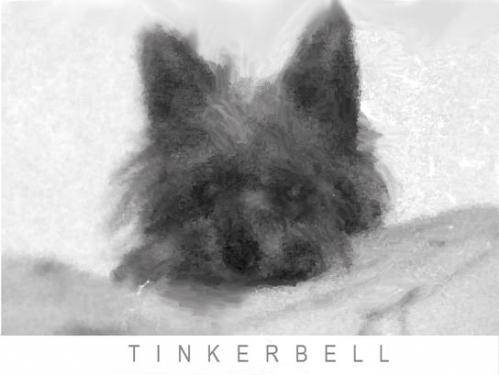

In [ ]:
#Erro
img_path = '/content/test_set/test_set/dogs/dog.4690.jpg'
img = tf.keras.preprocessing.image.load_img(
    img_path, target_size=(64,64)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print("Gato: %.2f por cento. Cachorro: %.2f por cento." % (100 * (1 - score), 100 * score))
displayImage(img_path)

Gato: 37.40 por cento. Cachorro: 62.60 por cento.


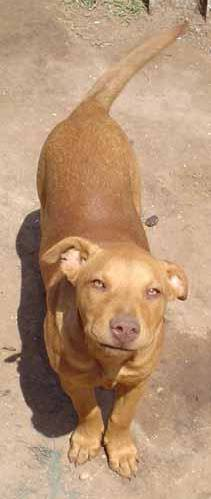

In [ ]:
img_path = '/content/test_set/test_set/dogs/dog.4712.jpg'
img = tf.keras.preprocessing.image.load_img(
    img_path, target_size=(64,64)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print("Gato: %.2f por cento. Cachorro: %.2f por cento." % (100 * (1 - score), 100 * score))
displayImage(img_path)

Gato: 78.58 por cento. Cachorro: 21.42 por cento.


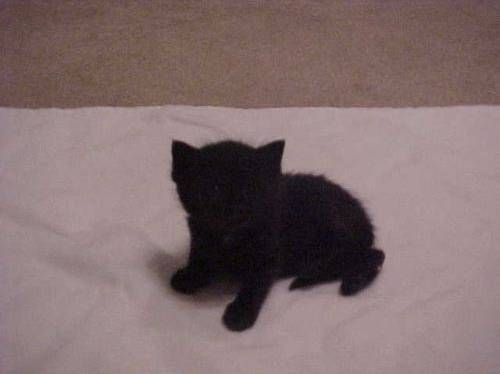

In [ ]:
img_path = '/content/test_set/test_set/cats/cat.4950.jpg'
img = tf.keras.preprocessing.image.load_img(
    img_path, target_size=(64,64)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print("Gato: %.2f por cento. Cachorro: %.2f por cento." % (100 * (1 - score), 100 * score))
displayImage(img_path)

Gato: 68.59 por cento. Cachorro: 31.41 por cento.


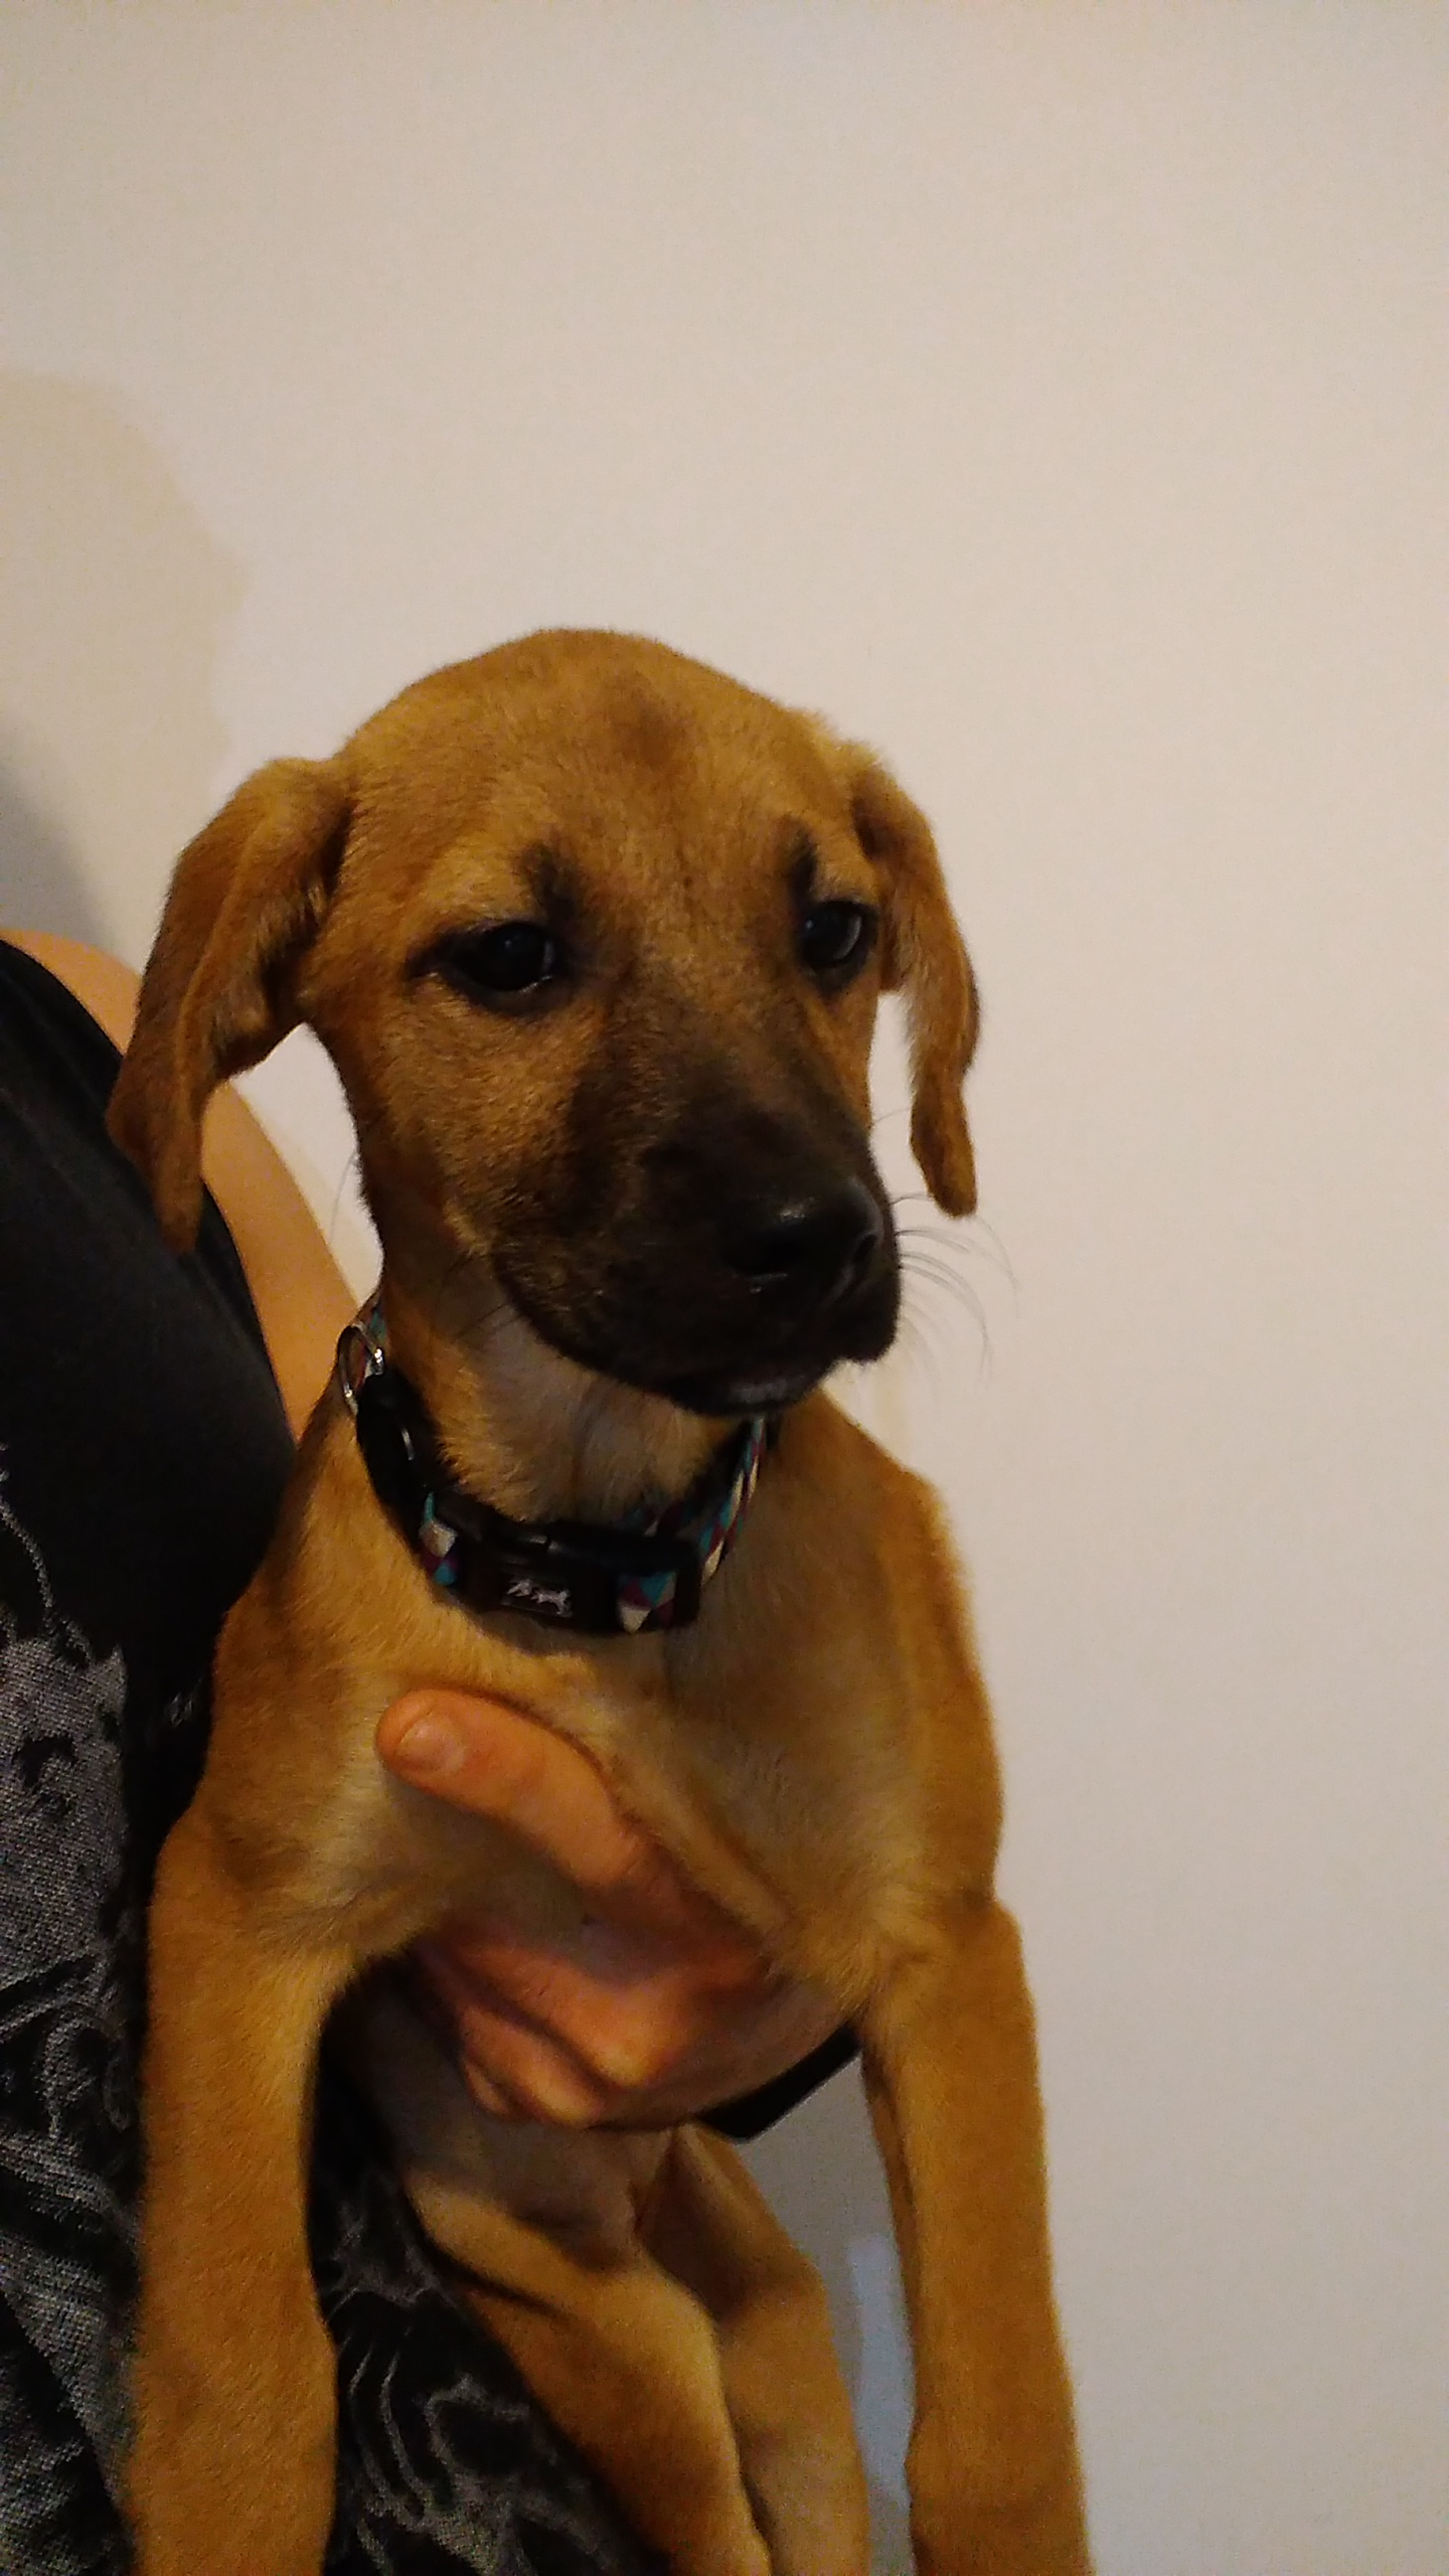

In [ ]:
img_path = '/content/arya1.jpg'
img = tf.keras.preprocessing.image.load_img(
    img_path, target_size=(64,64)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print("Gato: %.2f por cento. Cachorro: %.2f por cento." % (100 * (1 - score), 100 * score))
displayImage(img_path, width=320)

# VGG-16

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
random_flip_6 (RandomFlip)   (None, 64, 64, 3)         0         
_________________________________________________________________
random_rotation_6 (RandomRot (None, 64, 64, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)             

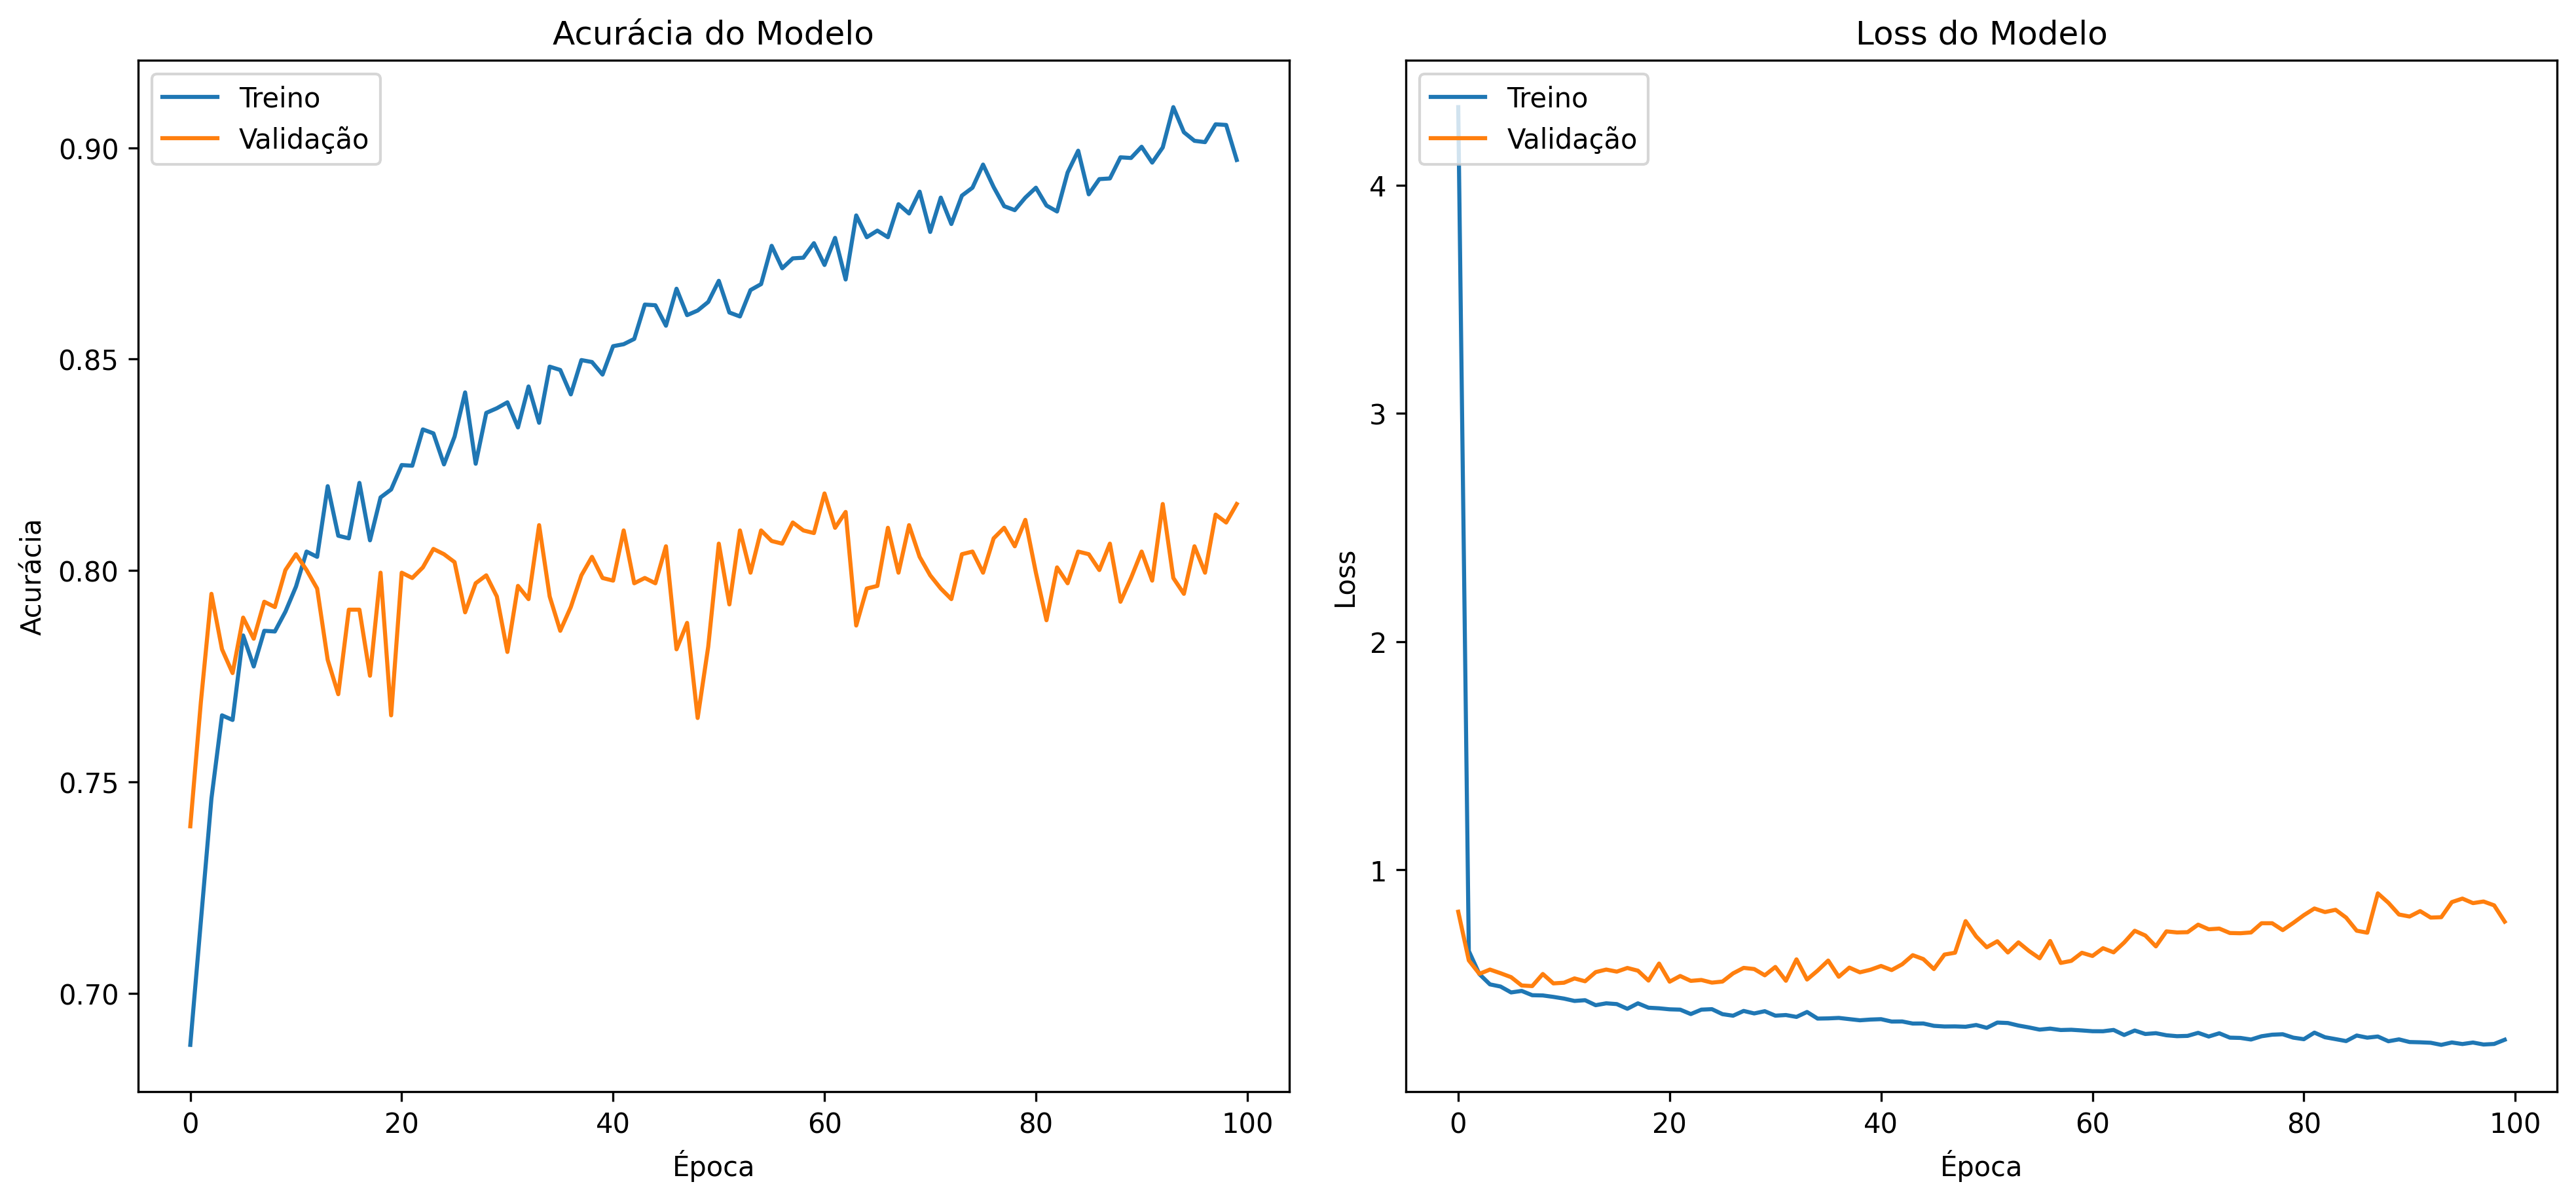

In [ ]:
#model = VGG16(include_top=False, input_shape=(64, 64, 3))

vgg = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64, 64, 3),
    pooling=None,
    classes=2,
)
for layer in vgg.layers:
	layer.trainable = False

inp = tf.keras.layers.Input(shape=(64, 64, 3))
x = tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")(inp)
x = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=(-0.2, 0.3))(x)
x = vgg(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_vgg = tf.keras.Model(inp,x)
model_vgg.summary()
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss='binary_crossentropy',
                metrics=['accuracy'])
history_vgg = model_vgg.fit(data_training,validation_data=data_validation,epochs=100)
plotHistory(history_vgg)


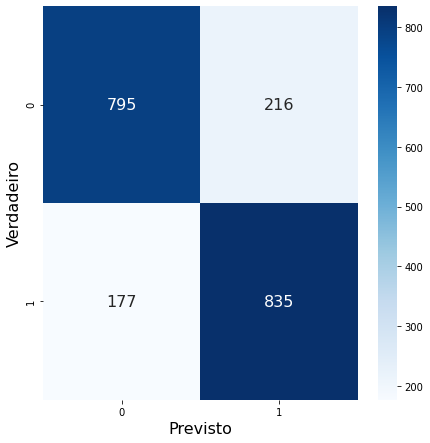

In [ ]:
resultado_vgg = model_vgg.predict(data_test)
rounded_vgg = np.round(resultado_vgg)
labels_vgg = []
for img in data_test.as_numpy_iterator():
  labels_vgg += list(img[1])
confmatrix(labels_vgg,rounded_vgg)

# MobileNetV2

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
random_flip_7 (RandomFlip)   (None, 64, 64, 3)         0         
_________________________________________________________________
random_rotation_7 (RandomRot (None, 64, 64, 3)         0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 2, 2, 1280)        2257984   
_________________________________________________________________
flatten_8 (Flatten)          (None, 5120)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1024)             

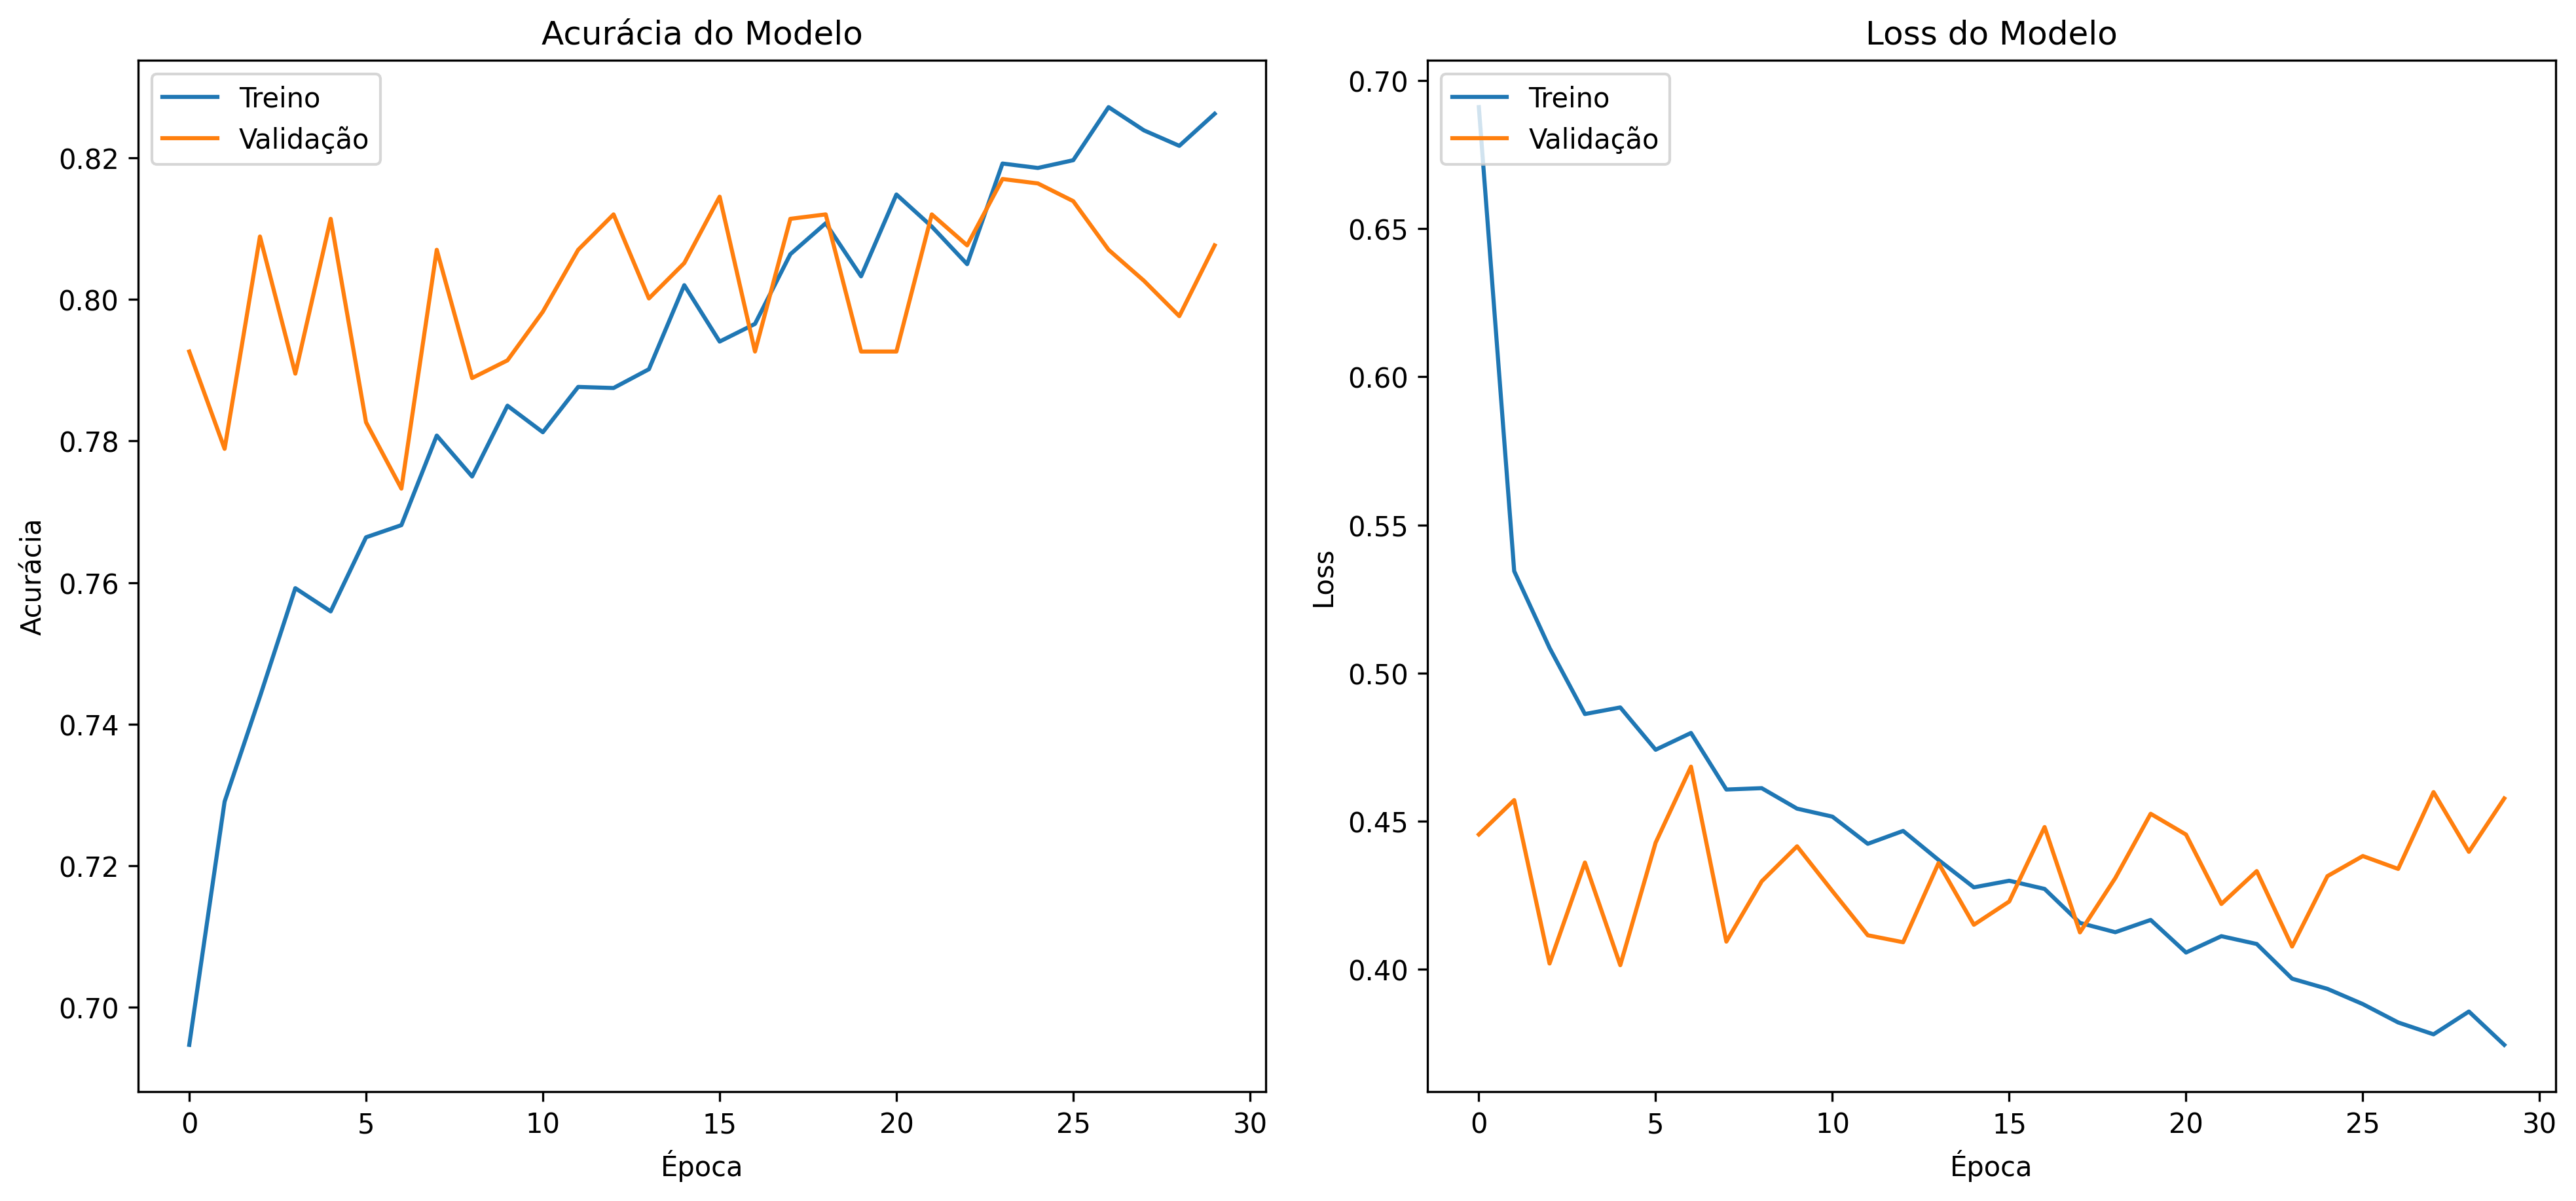

In [ ]:
batch_size = 64
lr = 0.001

mobilenet = tf.keras.applications.MobileNetV2(
    input_shape=(64, 64, 3),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
)

for layer in mobilenet.layers:
	layer.trainable = False

inp = tf.keras.layers.Input(shape=(64, 64, 3))
x = tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")(inp)
x = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=(-0.2, 0.3))(x)
x = tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)(x)
x = mobilenet(x)
#x = tf.keras.layers.Flatten()(mobilenet.outputs[-1])
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
#model = tf.keras.Model(inputs=mobilenet.inputs, outputs=x)
model_mobilenet = tf.keras.Model(inp,x)
model_mobilenet.summary()
model_mobilenet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss='binary_crossentropy',
                metrics=['accuracy'])
history_mobilenet = model_mobilenet.fit(data_training,validation_data=data_validation,epochs=30, shuffle=True)
plotHistory(history_mobilenet)

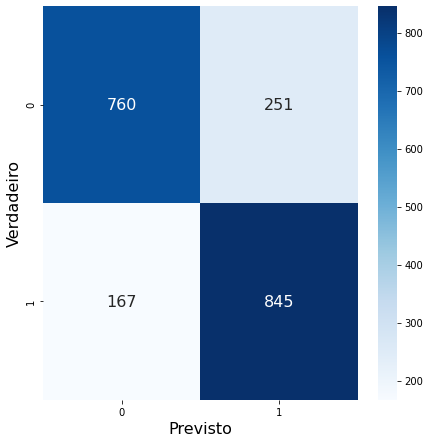

In [ ]:
resultado_mobilenet = model_mobilenet.predict(data_test)
rounded_mobilenet = np.round(resultado_mobilenet)
labels_mobilenet = []
for img in data_test.as_numpy_iterator():
  labels_mobilenet += list(img[1])
confmatrix(labels_mobilenet,rounded_mobilenet)

# MLPs (testes)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#model.fit(data[0][0],data[0][1],epochs=100)
history = model.fit(data_training,validation_data=data_validation,epochs=30)
plotHistory(history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3145984   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 3,187,201
Trainable params: 3,187,201
Non-trainable params: 0
_________________________________________________________________
None


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 12288)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 2056)              25266184  
_________________________________________________________________
dense_35 (Dense)             (None, 1028)              2114596   
_________________________________________________________________
dense_36 (Dense)             (None, 512)               526848    
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_39 (Dense)             (None, 256)              

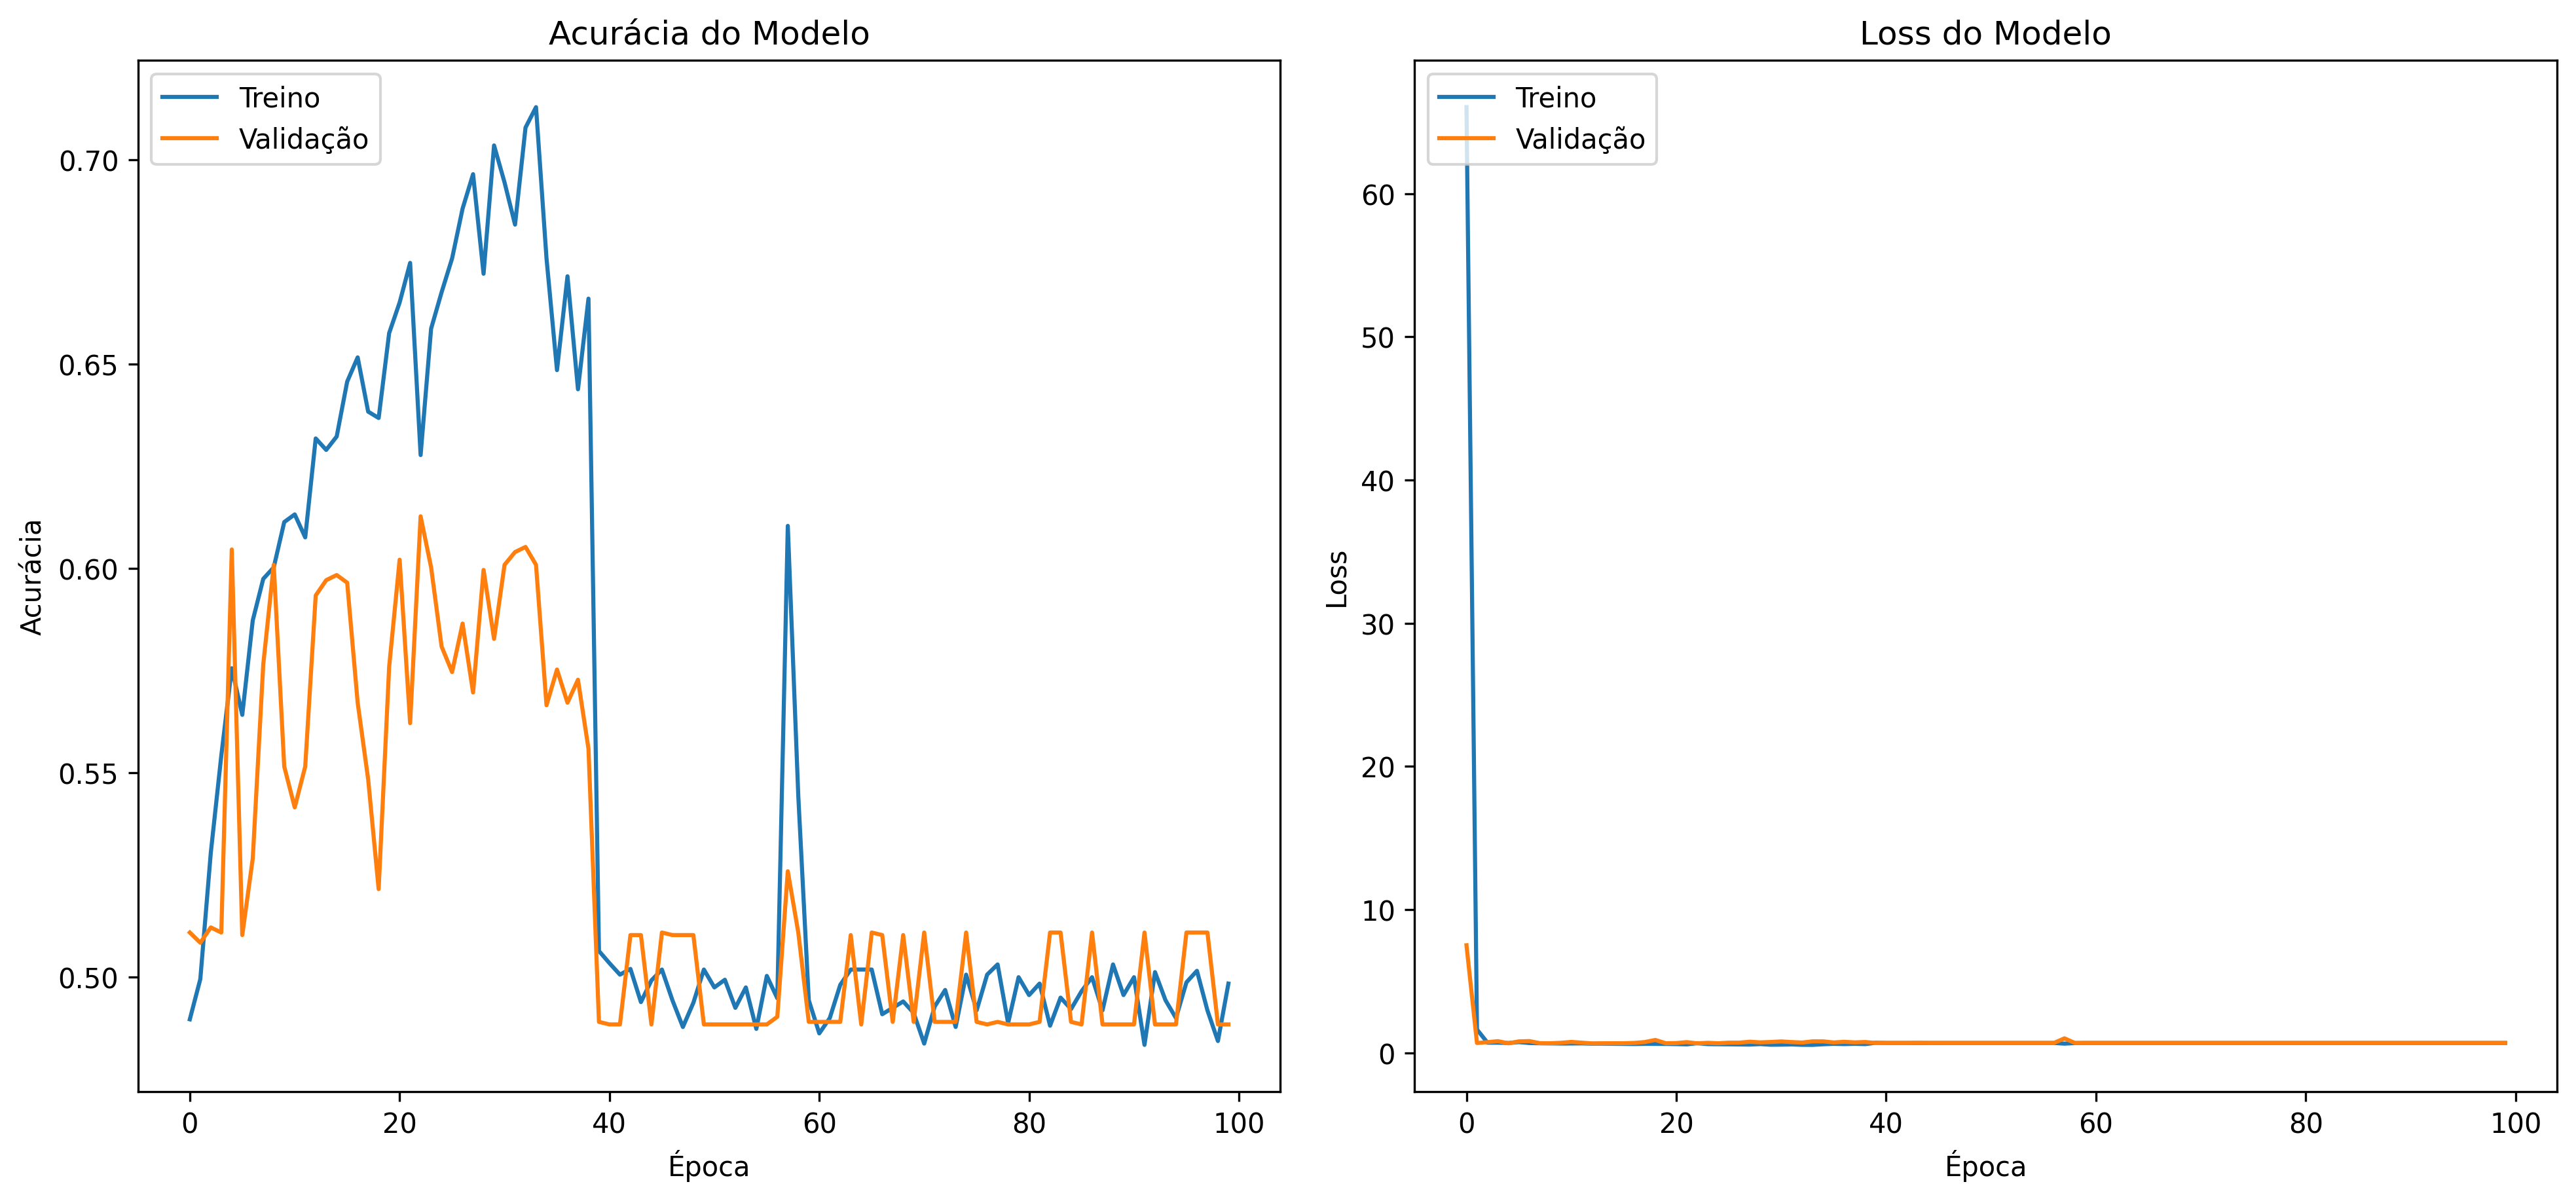

In [ ]:
model_MLP = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(128, 128, 3)),
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(2056, activation='relu'),
    tf.keras.layers.Dense(1028, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_MLP.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_MLP.summary()
history_MLP = model_MLP.fit(data_training,validation_data=data_validation,epochs=100)
plotHistory(history_MLP)


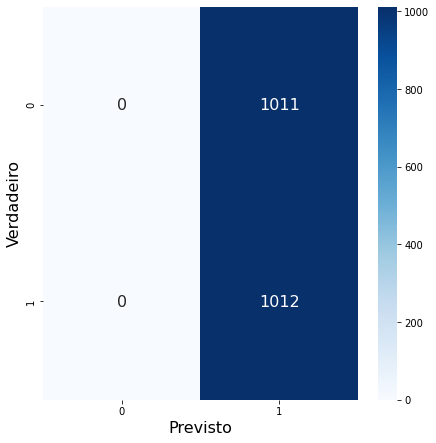

[[0.50194275]
 [0.50194275]
 [0.50194275]
 ...
 [0.50194275]
 [0.50194275]
 [0.50194275]]


In [ ]:
resultado_MLP = model_MLP.predict(data_test)
rounded_MLP = np.round(resultado_MLP)
labels_MLP = []
for img in data_test.as_numpy_iterator():
  labels_MLP += list(img[1])
confmatrix(labels_MLP,rounded_MLP)
print(resultado_MLP)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              12289000  
_________________________________________________________________
dense_5 (Dense)              (None, 800)               800800    
_________________________________________________________________
dense_6 (Dense)              (None, 600)               480600    
_________________________________________________________________
dense_7 (Dense)              (None, 400)               240400    
_________________________________________________________________
dense_8 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

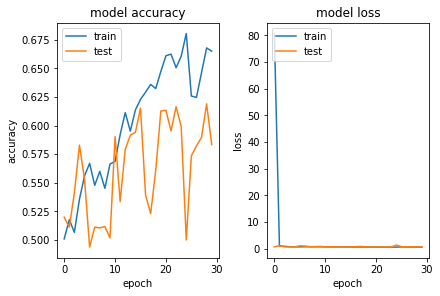

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
  ]
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(800, activation='relu'),
    tf.keras.layers.Dense(600, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#model.fit(data[0][0],data[0][1],epochs=100)
model.summary()
history = model.fit(data_training,validation_data=data_validation,epochs=30, callbacks=my_callbacks)
plotHistory(history)

# Vídeo
https://youtu.be/RYftAdli__g